In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [3]:
data= pd.read_csv('database_IND.csv')
pd.set_option('display.max_columns', None)
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
data.shape

(907, 27)

Data Analysis:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
data.isnull().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [8]:
data.drop(['country', 'country_long'], inplace= True, axis= 1)


In [9]:
data.drop(['other_fuel1','other_fuel2', 'other_fuel3', 'wepp_id','url','geolocation_source', 'generation_data_source', 'estimated_generation_gwh','source'], inplace= True, axis= 1)


In [10]:
data.drop(['year_of_capacity_data'], inplace= True, axis= 1)


In [11]:
data.isnull().sum()


name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

In [12]:
data['generation_gwh_2013'].fillna(value=data['generation_gwh_2013'].median(), inplace= True)
data['generation_gwh_2014'].fillna(value=data['generation_gwh_2014'].median(), inplace= True)
data['generation_gwh_2015'].fillna(value=data['generation_gwh_2015'].median(), inplace= True)
data['generation_gwh_2016'].fillna(value=data['generation_gwh_2016'].median(), inplace= True)
data['generation_gwh_2017'].fillna(value=data['generation_gwh_2017'].median(), inplace= True)

In [13]:
data['latitude'].fillna(value=data['latitude'].mean(), inplace= True)
data['longitude'].fillna(value=data['longitude'].mean(), inplace= True) 

In [14]:
data.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2013    907
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

EDA

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

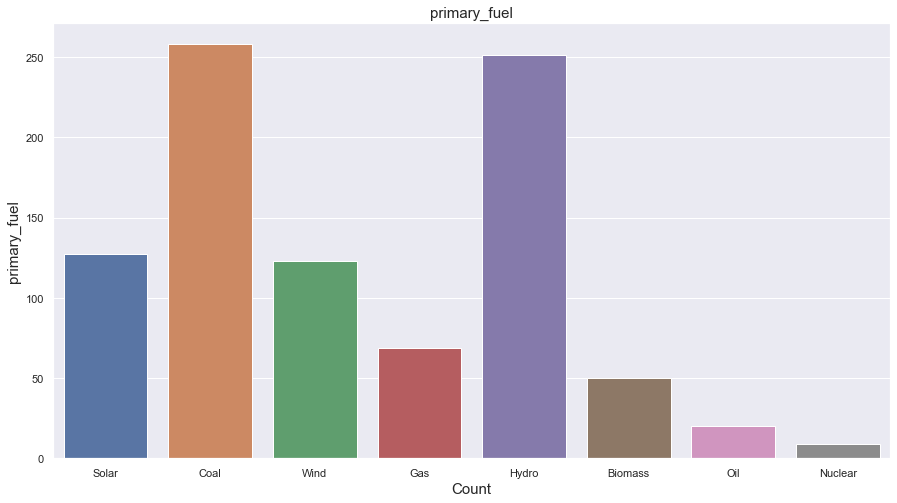

In [15]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
sns.countplot(data['primary_fuel'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('primary_fuel', fontsize=15 )
plt.title('primary_fuel', fontsize=15)

data['primary_fuel'].value_counts()

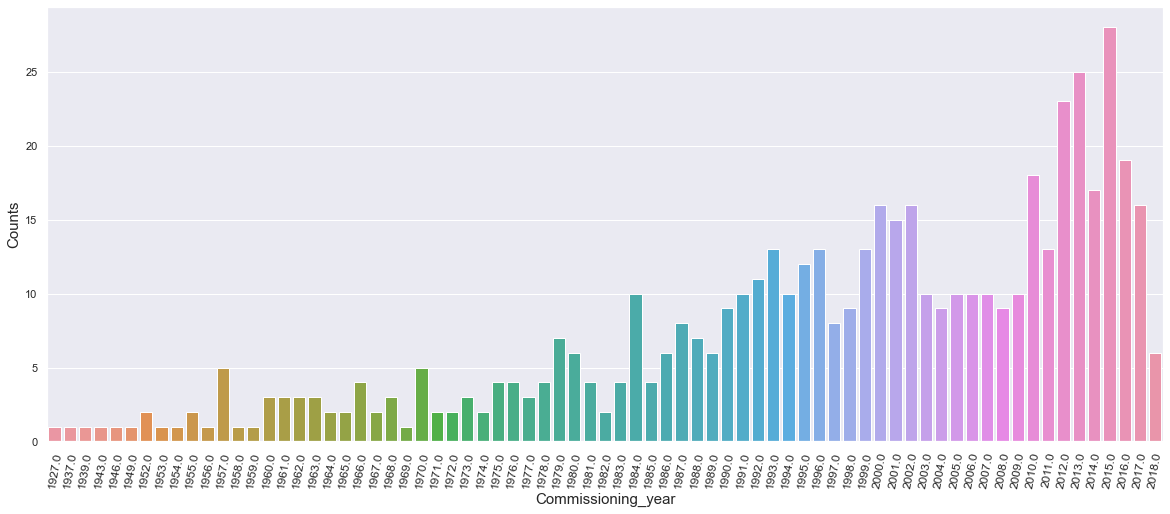

In [16]:
plt.figure(figsize=(20,8))
sns.countplot(data['commissioning_year'])
plt.xlabel('Commissioning_year', fontsize= 15)
plt.ylabel('Counts', fontsize= 15)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.show()

In [17]:
data['owner'].value_counts()

Sterling Agro Industries ltd.                 4
Acc Acc ltd                                   4
Jk Cement ltd                                 4
Ujaas Energy Limited                          3
Enercon India Ltd.                            3
                                             ..
Kranti Ssk ltd                                1
Sunflag Co ltd                                1
S J Green Park Energy Private Limited         1
Rajasthan State Mines and Minerals Limited    1
Greta Energy ltd                              1
Name: owner, Length: 280, dtype: int64

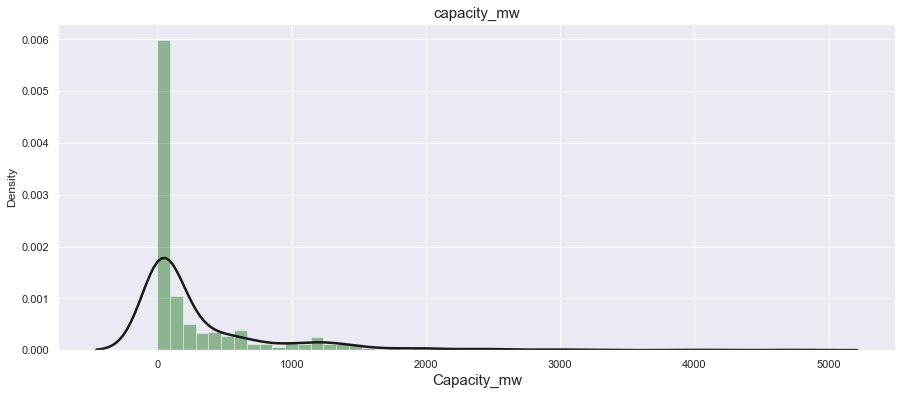

In [18]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,6))

sns.distplot(data['capacity_mw'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('capacity_mw', fontsize=15)
plt.xlabel('Capacity_mw', fontsize=15)
plt.show()

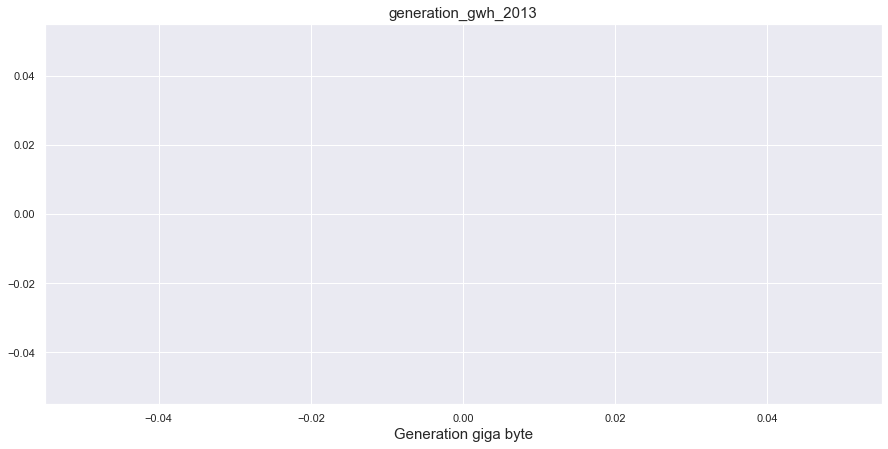

In [19]:
plt.figure(figsize=(15,7))

sns.distplot(data['generation_gwh_2013'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2013', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

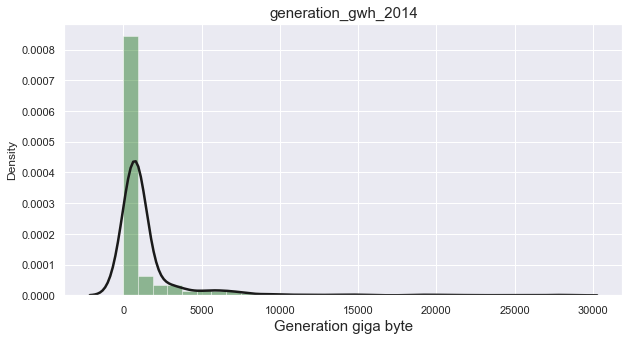

In [20]:
plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2014'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2014', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

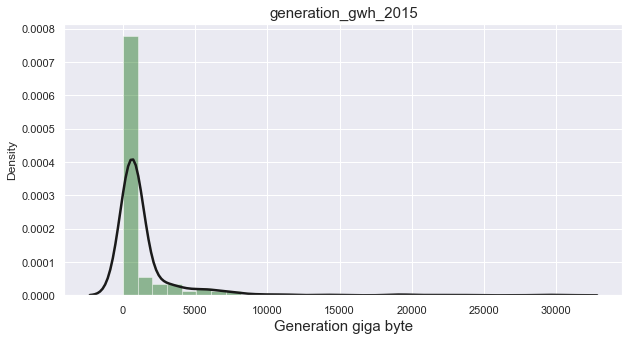

In [21]:
plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2015'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2015', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

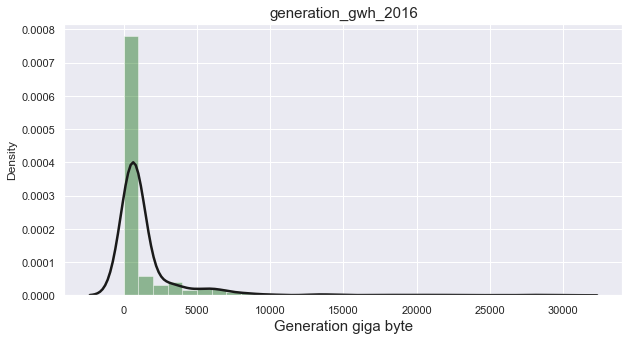

In [22]:
plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2016'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2016', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

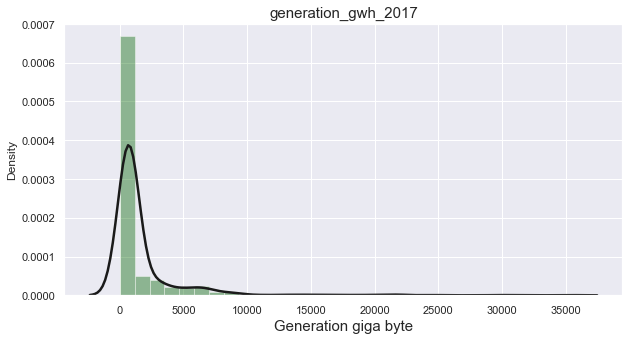

In [23]:
plt.figure(figsize=(10,5))

sns.distplot(data['generation_gwh_2017'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('generation_gwh_2017', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

Bivariate Analysis

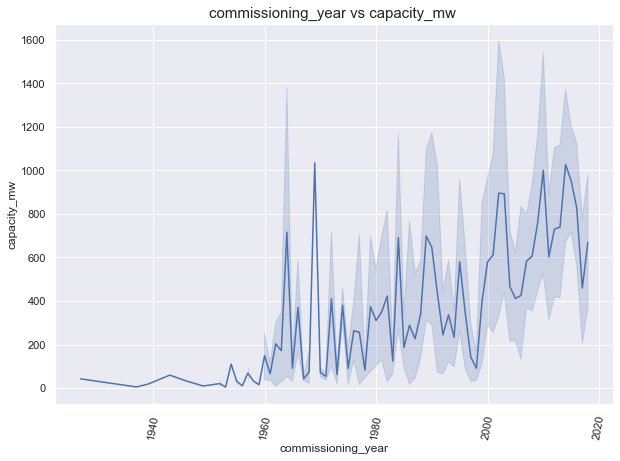

In [24]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='commissioning_year',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('commissioning_year vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

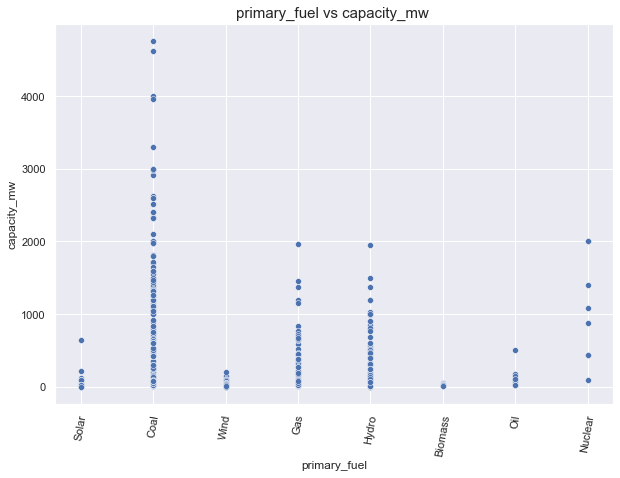

In [25]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data, x='primary_fuel',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('primary_fuel vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

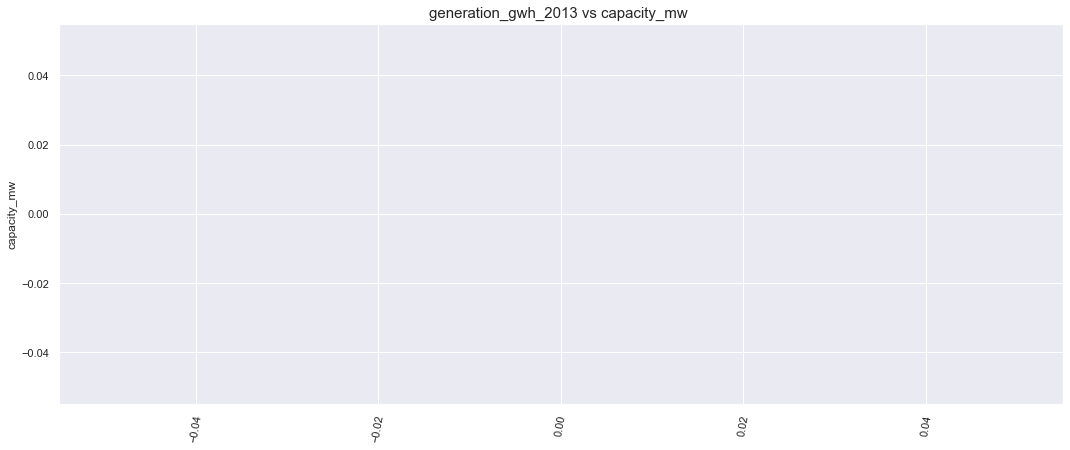

In [26]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='generation_gwh_2013',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('generation_gwh_2013 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

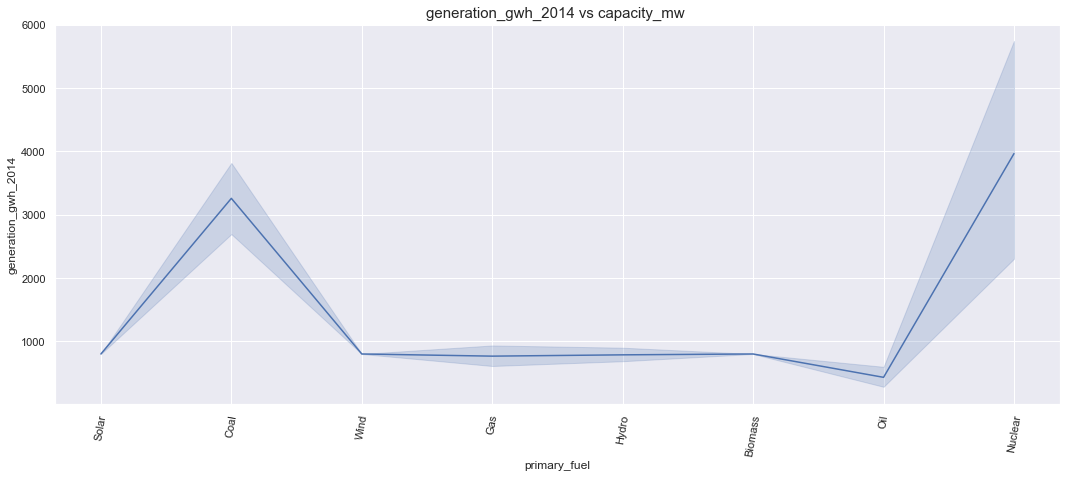

In [27]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='primary_fuel',y='generation_gwh_2014')
locs, labels = plt.xticks()
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

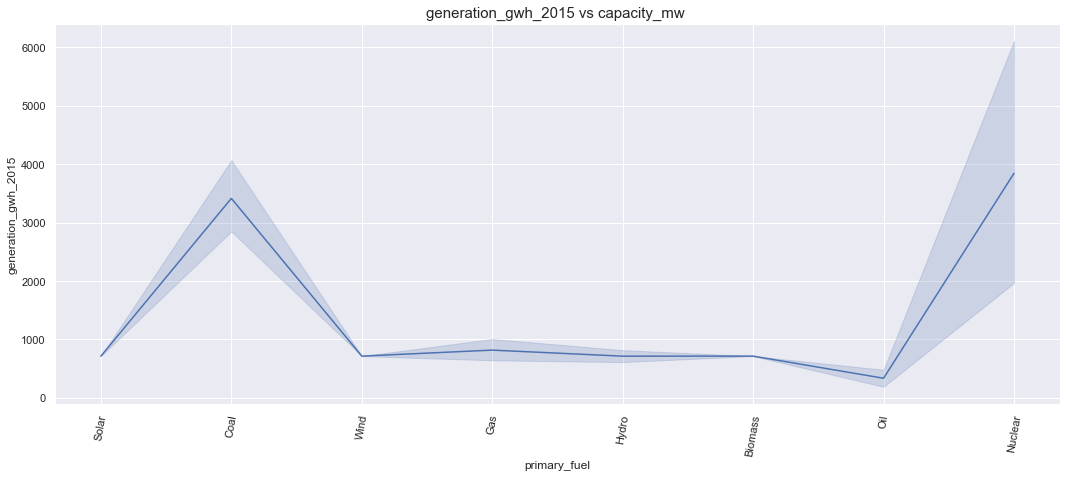

In [28]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='primary_fuel',y='generation_gwh_2015')
locs, labels = plt.xticks()
plt.title('generation_gwh_2015 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

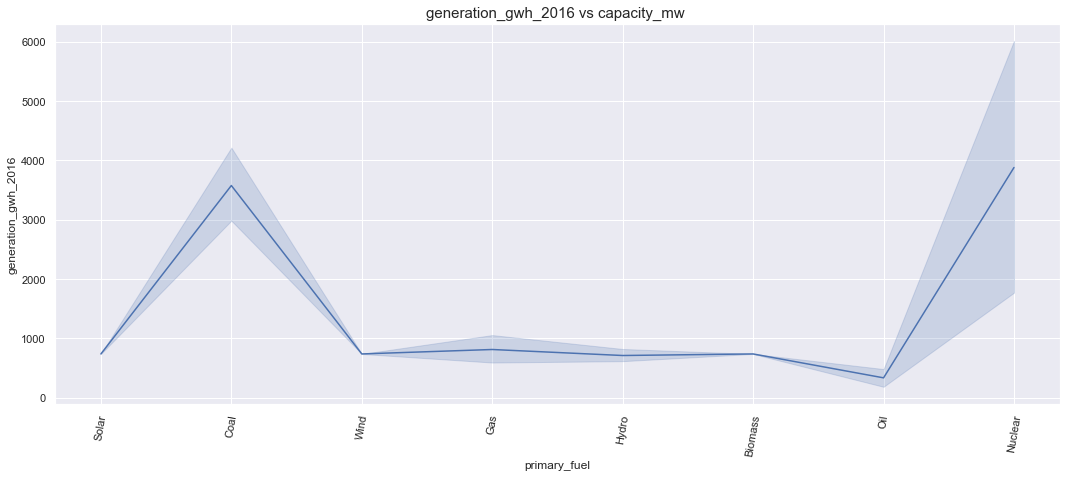

In [29]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='primary_fuel',y='generation_gwh_2016')
locs, labels = plt.xticks()
plt.title('generation_gwh_2016 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

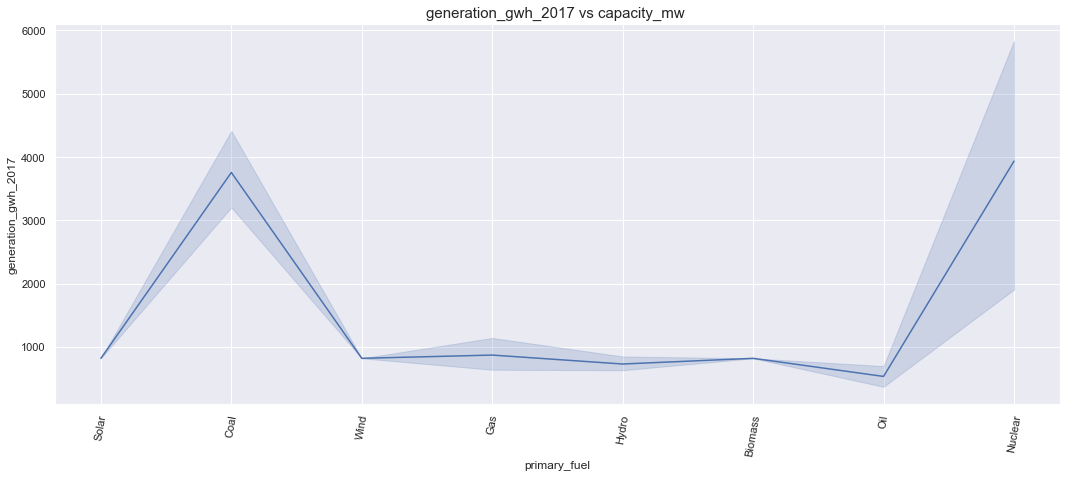

In [30]:
plt.figure(figsize=(18,7))
sns.lineplot(data=data, x='primary_fuel',y='generation_gwh_2017')
locs, labels = plt.xticks()
plt.title('generation_gwh_2017 vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

In [31]:
data.head(2)


,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,NaN,801.123775,711.181225,737.20545,817.97725,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,NaN,801.123775,711.181225,737.20545,817.97725,NaN,NaN


Multivariate analysis

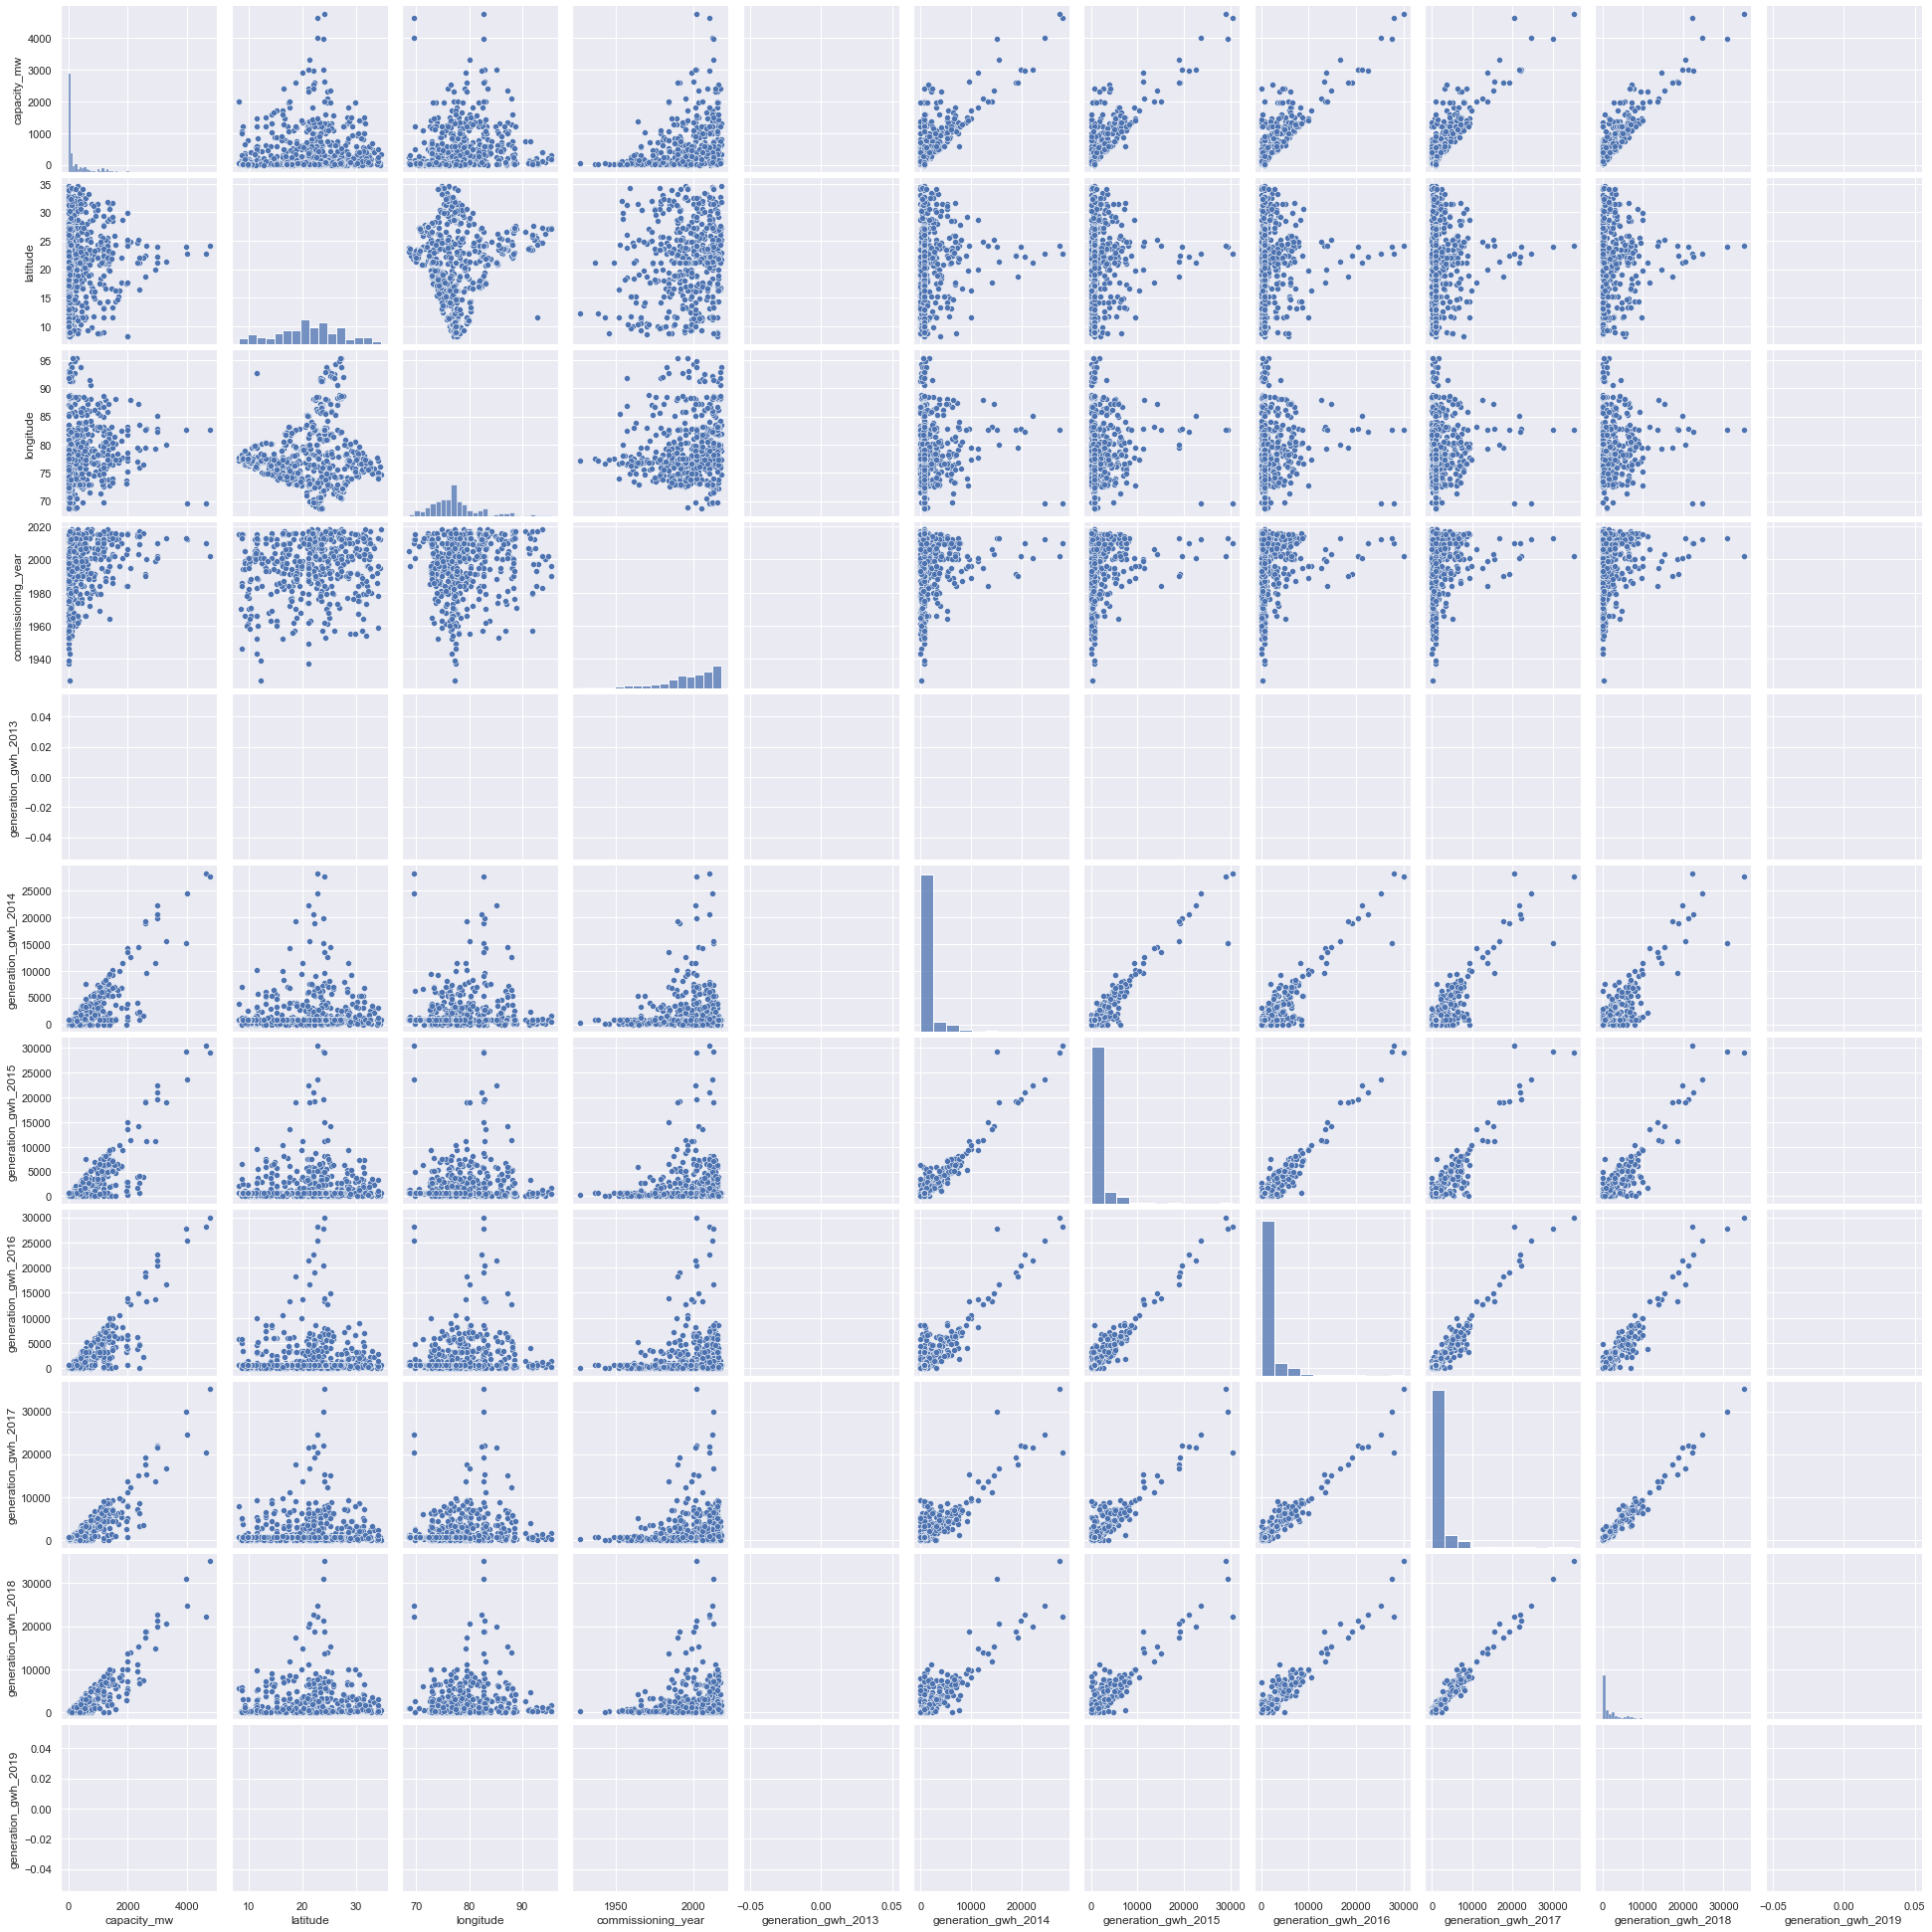

In [32]:
sns.pairplot(data)

Data Processing

In [33]:
data.drop(['name','gppd_idnr','owner','commissioning_year'], axis=1, inplace= True)

In [ ]:
Encoding Target columns

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['primary_fuel']=le.fit_transform(data['primary_fuel'])

In [35]:
data.head(3)

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,NaN,801.123775,711.181225,737.20545,817.97725,NaN,NaN
1,98.0,24.7663,74.6090,1,NaN,801.123775,711.181225,737.20545,817.97725,NaN,NaN
2,39.2,21.9038,69.3732,7,NaN,801.123775,711.181225,737.20545,817.97725,NaN,NaN


In [36]:
data.corr()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
capacity_mw,1.000000,0.050984,0.195882,-0.380395,NaN,0.793497,0.819676,0.853008,0.868338,0.901918,NaN
latitude,0.050984,1.000000,0.036362,-0.010204,NaN,0.058594,0.053869,0.047677,0.057897,0.041414,NaN
longitude,0.195882,0.036362,1.000000,-0.347948,NaN,0.104649,0.121513,0.143459,0.151712,0.050548,NaN
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,NaN,-0.240656,-0.249304,-0.259708,-0.263599,-0.421518,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.793497,0.058594,0.104649,-0.240656,NaN,1.000000,0.963719,0.935067,0.904075,0.887050,NaN
generation_gwh_2015,0.819676,0.053869,0.121513,-0.249304,NaN,0.963719,1.000000,0.973231,0.940229,0.927664,NaN
generation_gwh_2016,0.853008,0.047677,0.143459,-0.259708,NaN,0.935067,0.973231,1.000000,0.973909,0.961997,NaN
generation_gwh_2017,0.868338,0.057897,0.151712,-0.263599,NaN,0.904075,0.940229,0.973909,1.000000,0.985604,NaN
generation_gwh_2018,0.901918,0.041414,0.050548,-0.421518,NaN,0.887050,0.927664,0.961997,0.985604,1.000000,NaN


<AxesSubplot:>

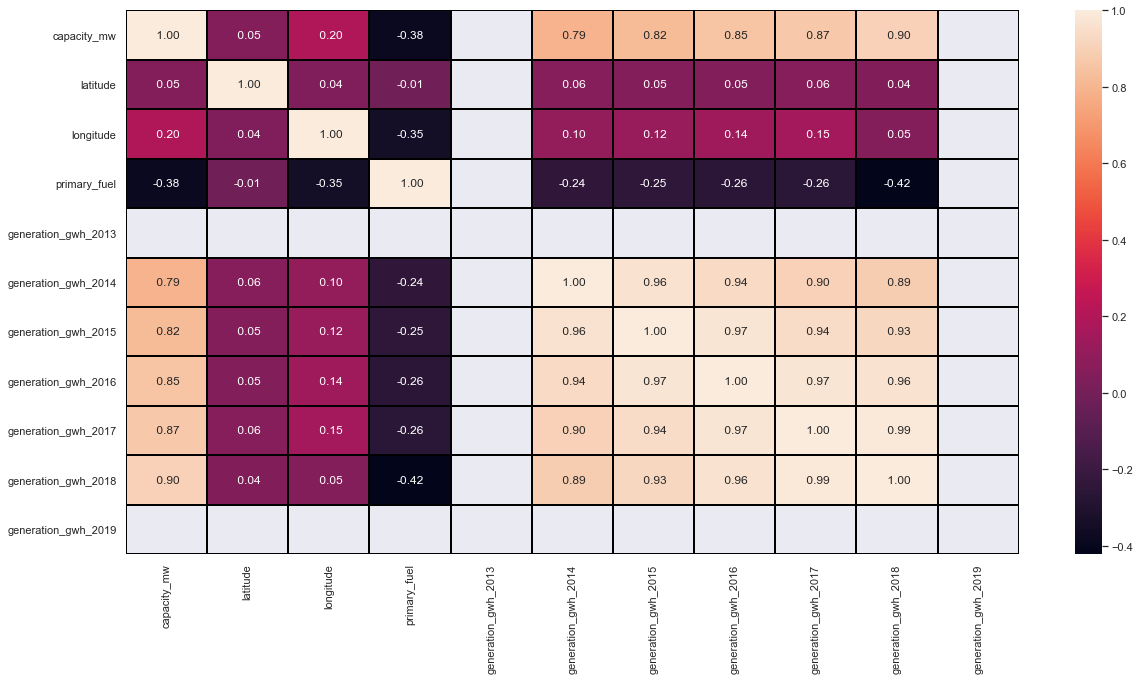

In [37]:
plt.figure(figsize=(20,10))

sns.heatmap(data.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

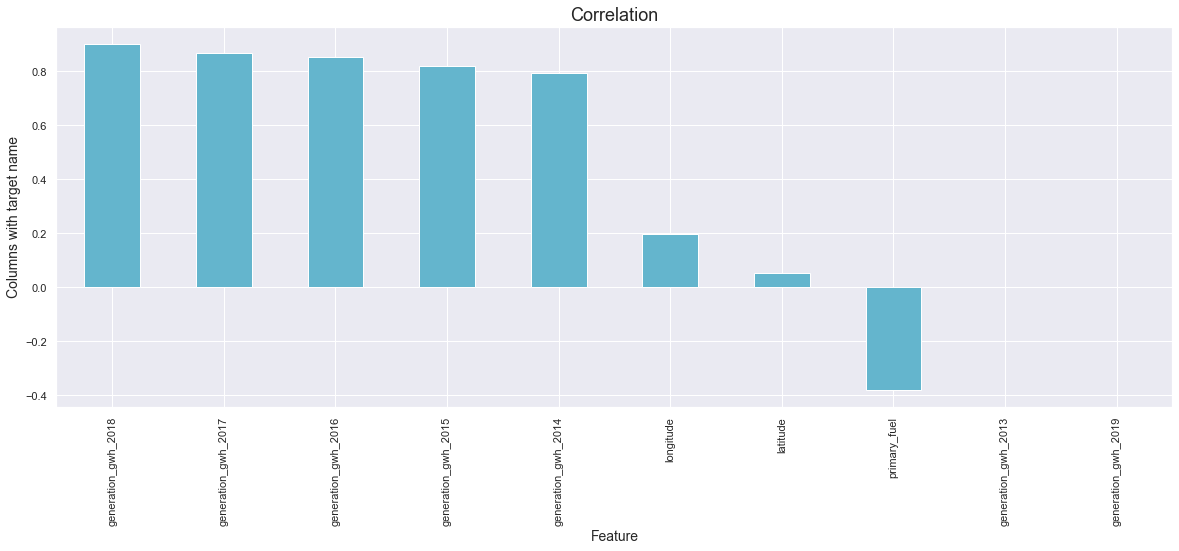

In [38]:
plt.figure(figsize=(20,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Checking outliers

<AxesSubplot:>

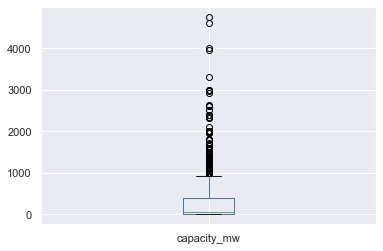

In [39]:
data['capacity_mw'].plot.box()

<AxesSubplot:>

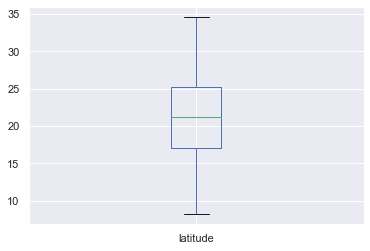

In [40]:
data['latitude'].plot.box()

<AxesSubplot:>

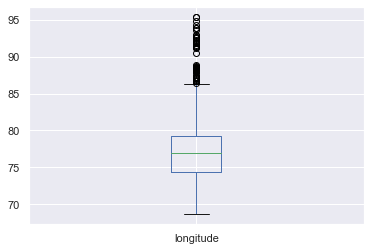

In [41]:
data['longitude'].plot.box()

<AxesSubplot:>

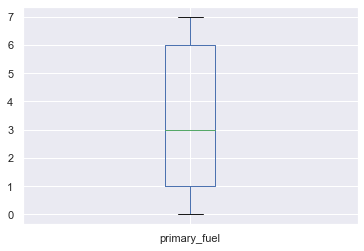

In [42]:
data['primary_fuel'].plot.box()

<AxesSubplot:>

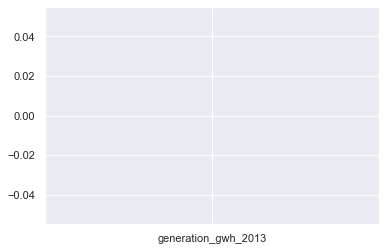

In [43]:
data['generation_gwh_2013'].plot.box()

<AxesSubplot:>

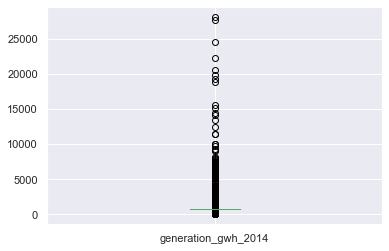

In [44]:
data['generation_gwh_2014'].plot.box()

<AxesSubplot:>

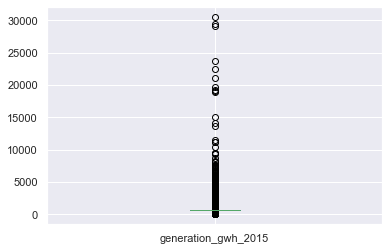

In [45]:
data['generation_gwh_2015'].plot.box()

<AxesSubplot:>

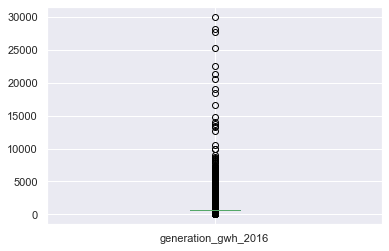

In [46]:
data['generation_gwh_2016'].plot.box()

<AxesSubplot:>

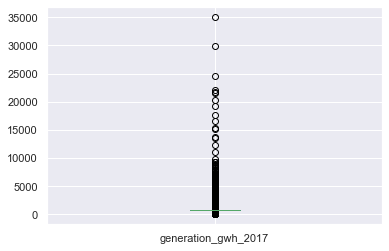

In [47]:
data['generation_gwh_2017'].plot.box()

Removing Outliers

In [48]:
from scipy.stats import zscore
z= np.abs(zscore(data))

In [49]:
threshold= 3 
print(np.where(z>3))

(array([ 15,  15,  15,  15, 143, 143, 143, 143, 143, 147, 158, 179, 183,
       209, 209, 209, 209, 209, 244, 308, 308, 308, 308, 308, 323, 333,
       340, 360, 363, 364, 364, 364, 364, 364, 375, 416, 427, 482, 493,
       493, 493, 493, 493, 494, 494, 494, 494, 494, 499, 519, 532, 546,
       577, 623, 638, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657,
       695, 695, 695, 695, 695, 721, 721, 721, 721, 724, 724, 724, 724,
       726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 788, 808,
       808, 808, 808, 808, 818, 847, 880, 880, 880, 880, 880], dtype=int64), array([0, 6, 7, 8, 0, 5, 6, 7, 8, 0, 5, 2, 2, 0, 5, 6, 7, 8, 2, 0, 5, 6,
       7, 8, 2, 2, 2, 2, 0, 0, 5, 6, 7, 8, 0, 2, 2, 0, 0, 5, 6, 7, 8, 0,
       5, 6, 7, 8, 2, 2, 5, 2, 2, 5, 2, 0, 5, 6, 7, 8, 0, 5, 6, 7, 8, 0,
       5, 6, 7, 8, 5, 6, 7, 8, 5, 6, 7, 8, 0, 5, 6, 7, 8, 0, 0, 5, 6, 7,
       8, 0, 0, 5, 6, 7, 8, 2, 2, 0, 5, 6, 7, 8], dtype=int64))


In [50]:
df=data[(z<3).all(axis=1)]
print(data.shape)
print(df.shape)

(907, 11)
(0, 11)


In [51]:
Loss_percentage=(908-866)/908*100
print(Loss_percentage)

4.6255506607929515


In [52]:
df.shape

(0, 11)

In [53]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019


In [54]:
df.skew()

capacity_mw           NaN
latitude              NaN
longitude             NaN
primary_fuel          NaN
generation_gwh_2013   NaN
generation_gwh_2014   NaN
generation_gwh_2015   NaN
generation_gwh_2016   NaN
generation_gwh_2017   NaN
generation_gwh_2018   NaN
generation_gwh_2019   NaN
dtype: float64

In [55]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019'],
      dtype='object')